# Requirement
Final Assignment

- We have given a heart disease dataset in class. Perform  EDA Analysis consisting of 8-9 Graphs.  --> Done

- The Model applied should be accurate to around 90 % --> Done

- You may apply any model of your choice.  --> Done

- Construct Confusion Matrix displayed in a heat map ( Self - Learning )  --> Done


##### Using python version 3.10.4 64-bit

# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading dataset
df = pd.read_csv("heart.csv")

In [3]:
# calling first 5 values of data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
# now looking at its number of rows and columns
df.shape

(1025, 14)

In [5]:
# or
rows, cols = df.shape
print("Number of Rows       = ", rows)
print("Number of Columns    = ", cols)

Number of Rows       =  1025
Number of Columns    =  14


## Check Data structure of each column or series


In [6]:
# checking the structure of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


## Missing values in each column and whole data set


In [7]:
# how many missing values present
df.isnull().sum()
# We will calculated the percentage of missing values, and if the percentage of missing value is high then we will reduce the priority of that column.
# We can deal with the missing values if the percentage is low by replacing them with the means, median or other methods(removal).

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# percentage of missing values
df.isnull().sum() / df.shape[0] * 100


age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

## Summary statistics


In [9]:
#This gives us all the basic statistical summary about the data count, mean, std, min, max and percent quantiles of the Data Frame for each column as shown here:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Value counts of a specific column


In [10]:
# This will let us know, That which column has how many number of values.

df['age'].value_counts()
# As you can see there are several columns where you can also find the duplicate values.


58    68
57    57
54    53
59    46
52    43
51    39
56    39
62    37
60    37
44    36
64    34
41    32
63    32
67    31
61    31
55    30
65    27
43    26
42    26
53    26
66    25
45    25
48    23
46    23
50    21
47    18
49    17
35    15
39    14
70    14
68    12
38    12
71    11
40    11
69     9
37     6
34     6
29     4
76     3
77     3
74     3
Name: age, dtype: int64

## Check the normal distribution of data(data Anomally)


<AxesSubplot:xlabel='age', ylabel='Count'>

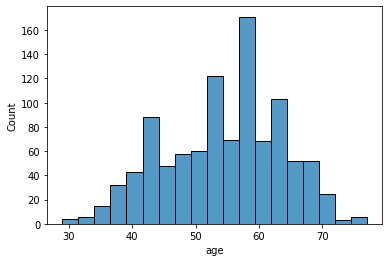

In [11]:
# plot histogram
sns.histplot(df['age'])


In [12]:
# If you want to measure the skewness and kurtosis of the distribution, you can use the code down below
#measure its skewness and kurtosis
df['age'].agg(['skew', 'kurtosis']).transpose()
# imp--> it does not matter to transpose it or not
# skew --> straight
# kurtosis --> high


skew       -0.248866
kurtosis   -0.525618
Name: age, dtype: float64

## Plots

c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

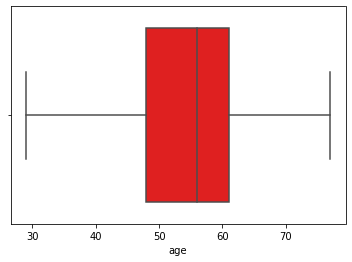

In [13]:
# We see here that the age distribution was skewed to the right. Now, Let’s check the outlier for the total_bill column with Boxplot.

sns.boxplot(df['age'], color="red")
# No outliers


c:\Users\Anonymous\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

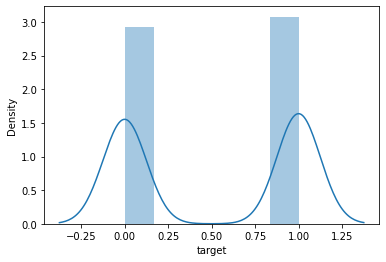

In [14]:
# plot target
sns.distplot(df.target)
# or sns.distplot(df[target])

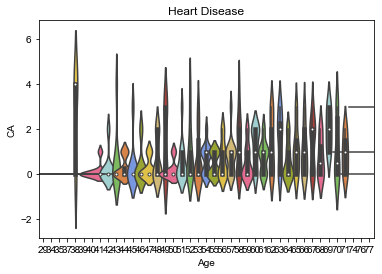

In [15]:
colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',
               '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']

ax = sns.violinplot(x='age', y='ca', palette=colors_list,data=df,width=5)
sns.set(rc={'figure.figsize': (15, 15)})
ax.set_title("Heart Disease")
ax.set_ylabel("CA")
ax.set_xlabel("Age")


plt.show()


<AxesSubplot:xlabel='oldpeak', ylabel='thal'>

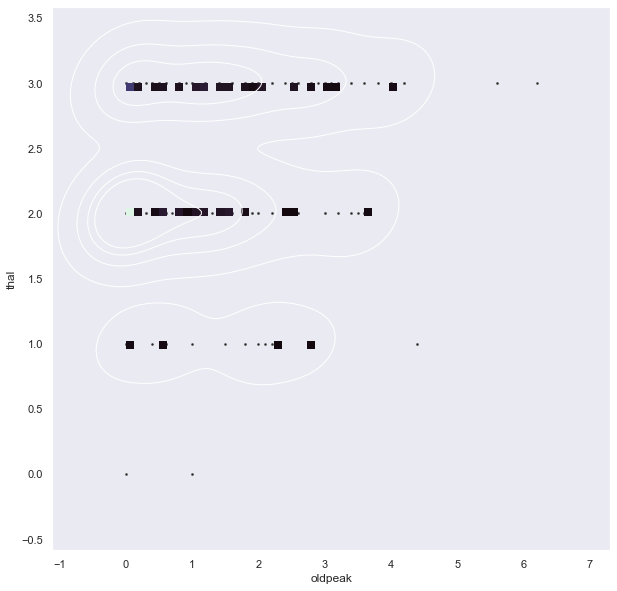

In [16]:
sns.set_theme(style="dark")


# Draw a combo histogram and scatterplot with density contours
f, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='oldpeak', y='thal', s=5, color=".15",data=df)
sns.histplot(x='oldpeak', y='thal', bins=50, pthresh=.1, cmap="mako", data=df)
sns.kdeplot(x='oldpeak', y='thal', levels=5, color="w", linewidths=1, data=df)


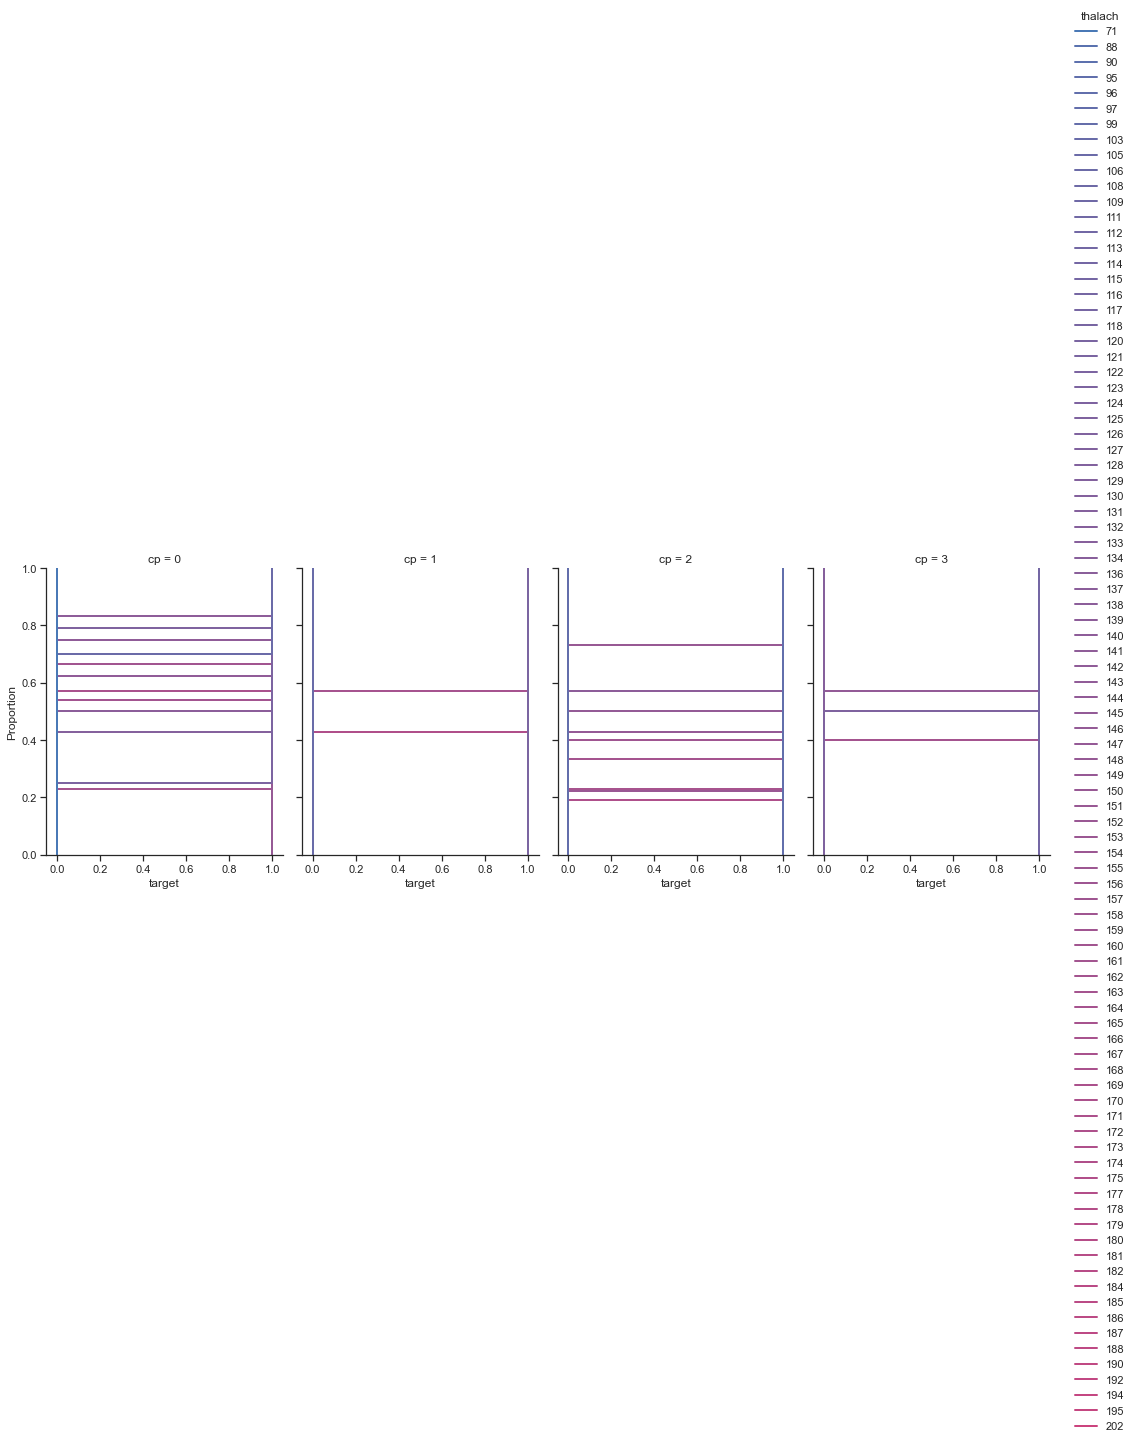

In [17]:
sns.set_theme(style="ticks")
colors = (250, 70, 50), (350, 70, 50)
cmap = sns.blend_palette(colors, input="husl", as_cmap=True)
sns.displot(
    df,
    x="target", col="cp", hue="thalach",
    kind="ecdf", aspect=.75, linewidth=2, palette=cmap,
)

<AxesSubplot:xlabel='cp', ylabel='target'>

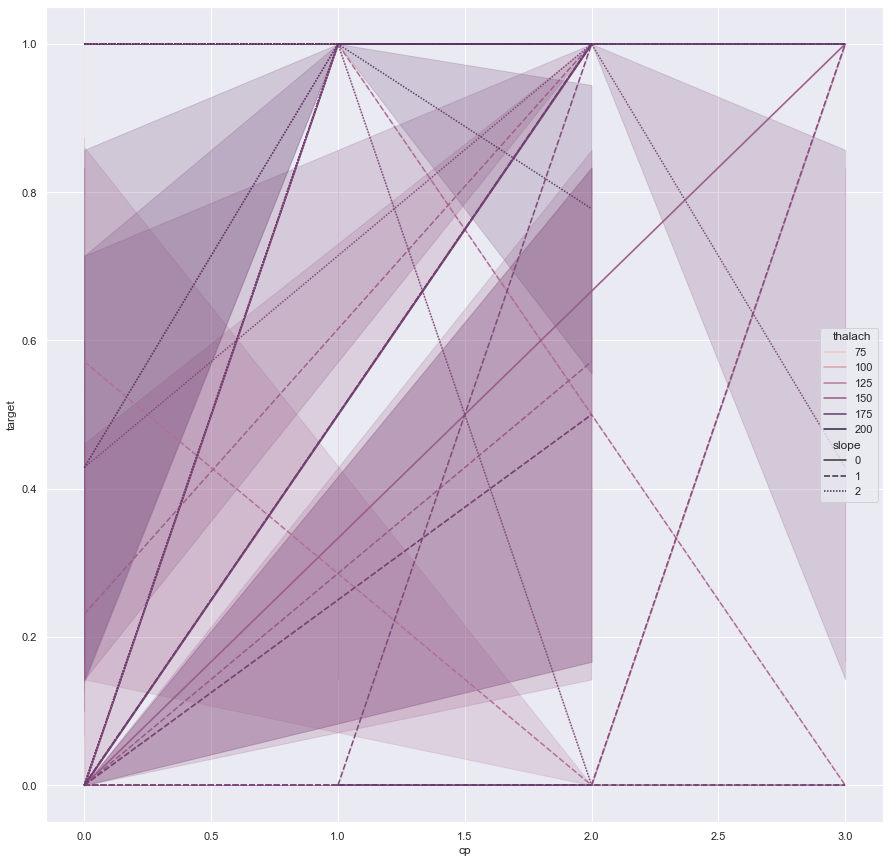

In [18]:
sns.set_theme(style="darkgrid")
sns.lineplot(x="cp", y="target",
             hue="thalach", style="slope",
             data=df)


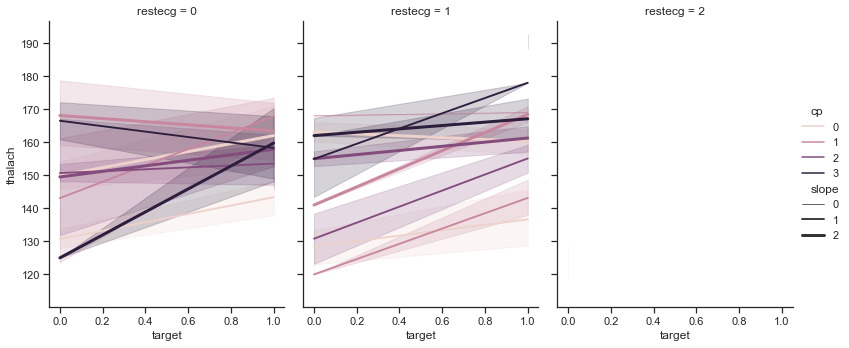

In [19]:
sns.set_theme(style="ticks")

sns.relplot(
    data=df,
    x="target", y="thalach",
    hue="cp", size="slope", col="restecg",
    kind="line", size_order=["T1", "T2"],
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

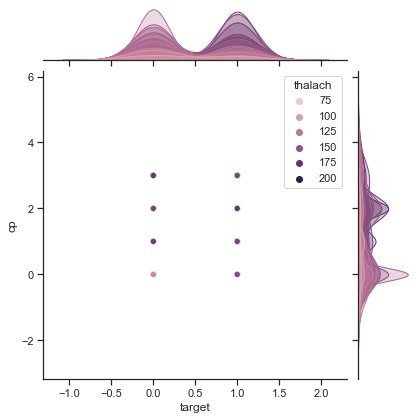

In [20]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="target", y="cp", hue="thalach",
    kind="scatter",
)


## Correlation between two variables(columns/series)
    

In [21]:
#Checking the correlation between variables is also necessary to see potential a feature that we can use for further analysis or building a model later.
# We can use a correlation matrix to get this.
# drawing correlation
corr = df.corr(method="pearson")  # you can use spearman if you want
corr
# this will display a correlation matrix
# relationship between variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<AxesSubplot:>

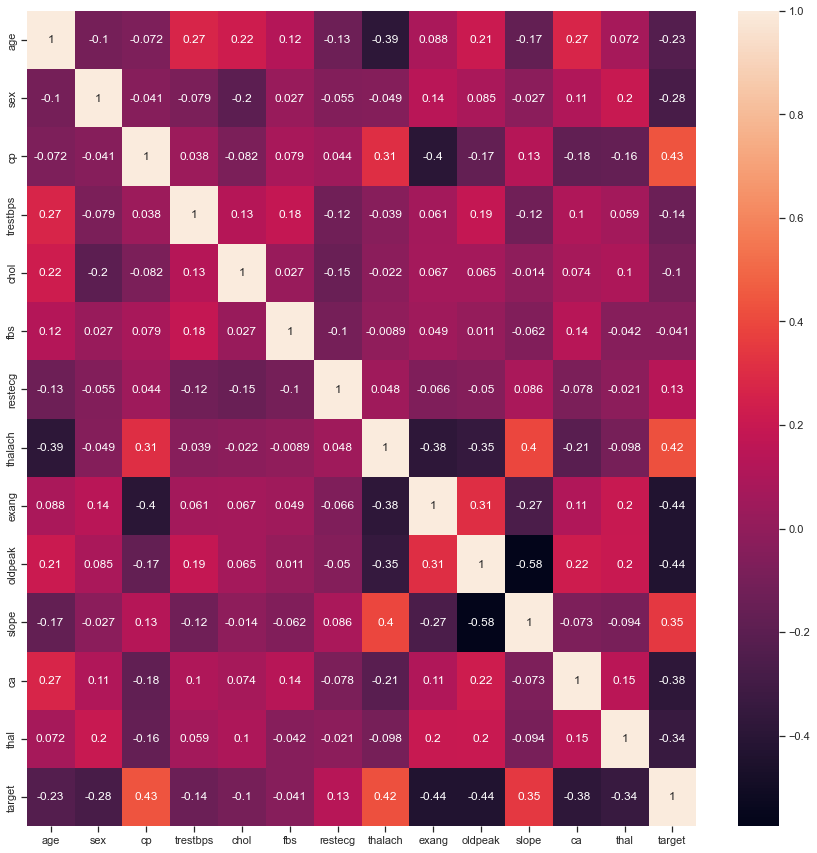

In [22]:
#We can also draw a heatmap of correlation matrix instead of reading number

sns.heatmap(corr, annot=True)
# this will show the numbers with colors


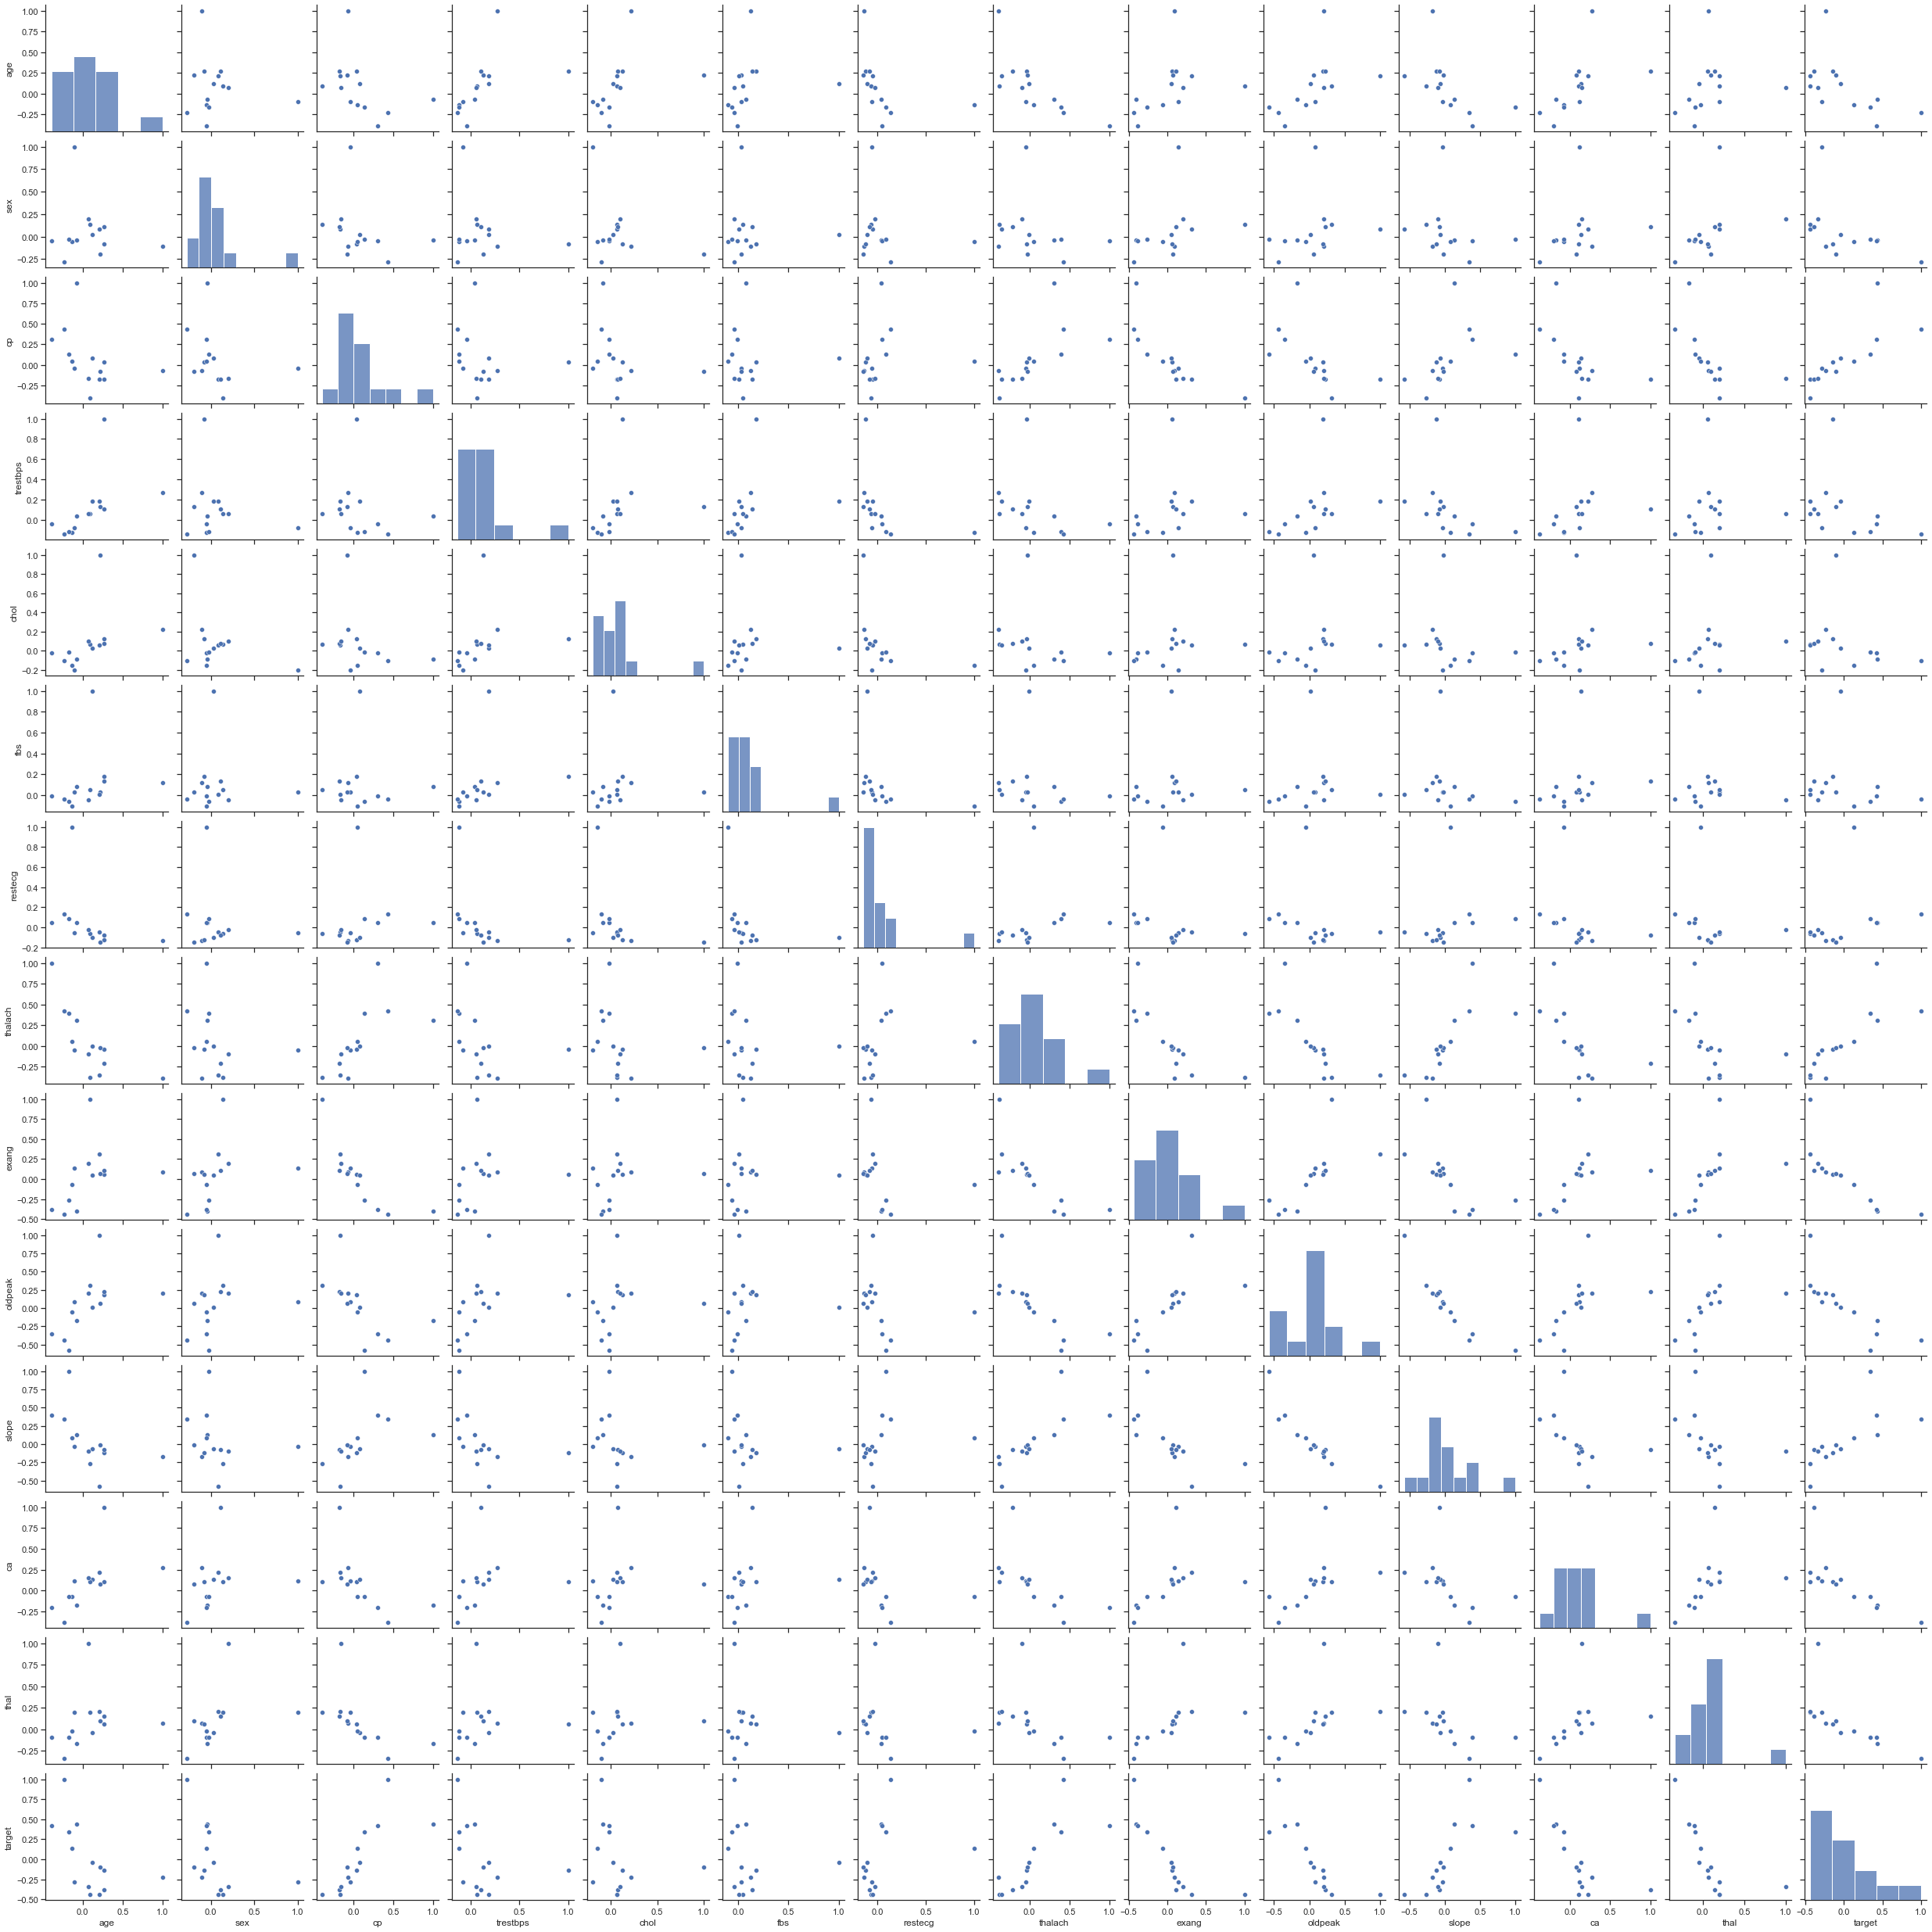

In [23]:
# we can also draw a pairplot to see the correlation
sns.pairplot(corr)


## splitting our data into x and y


In [24]:
#x = df['time_to_dep[s]', 'travel_time[s]','f6', 'f7', 'f8', 'f9']
# or
x = df.drop(['target'],axis=1)
y= df['target']

In [25]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [26]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

# ML Modeling

In [31]:
# regression pipline or algos as y is numeric
# for classifier f1,precision,recall scores

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
# Root ,ean squared error
# res = mean_absolute_error(y_test,y_pred,squared=False)

In [28]:
# shorten the names
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
krn = KNeighborsRegressor()
gb = GaussianNB()

In [29]:
# model loop
X_train,X_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=42)
for i in [lr, dt, svr, krn, gb]:  # read all models
    i.fit(X_train,y_train) # fitting our models
    pred= i.predict(X_test) # predict
    test_score = r2_score(y_test,pred) # test_score
    train_score = r2_score(y_train,i.predict(X_train)) # train score
    if abs(train_score-test_score <= 0.1):
        print(i)
        print('R2 score is: ', r2_score(y_test,pred))
        print('Mean Absolute error is: ', mean_absolute_error(y_test, pred))
        print('Mean Squared Error: ', mean_squared_error(y_test,pred))
        print("Score for Training Data = ", i.score(X_train, y_train))
        print("Score for Testing Data = ", i.score(X_test, y_test))
        print("--------------------------------------------------")
        

DecisionTreeRegressor()
R2 score is:  0.9414620217018846
Mean Absolute error is:  0.014634146341463415
Mean Squared Error:  0.014634146341463415
Score for Training Data =  1.0
Score for Testing Data =  0.9414620217018846
--------------------------------------------------


## Confusion matrix

Confusion Matrix Tree : 



<AxesSubplot:>

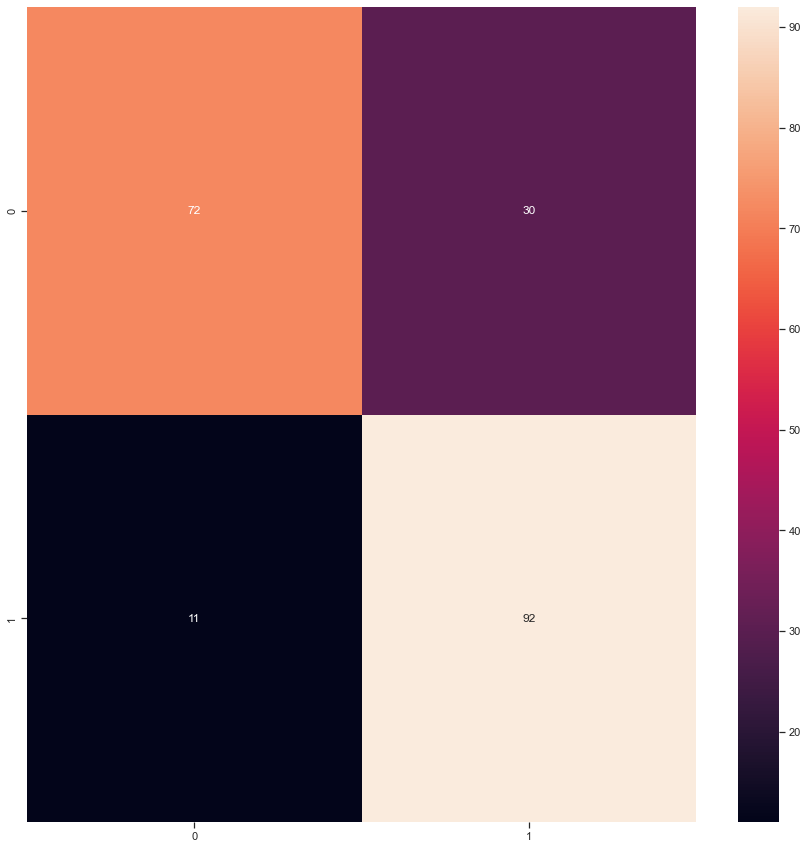

In [34]:
print("Confusion Matrix Tree : \n")
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)